In [54]:
import pandas as pd
import numpy as np
from statsmodels.tsa.filters.hp_filter import hpfilter
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
df=pd.read_csv('C:/Users/anuj/Documents/Anuj/MMA/Udemy/Python/Time Series/UDEMY_TSA_FINAL/Data/macrodata.csv',index_col=0,parse_dates=True)

In [11]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


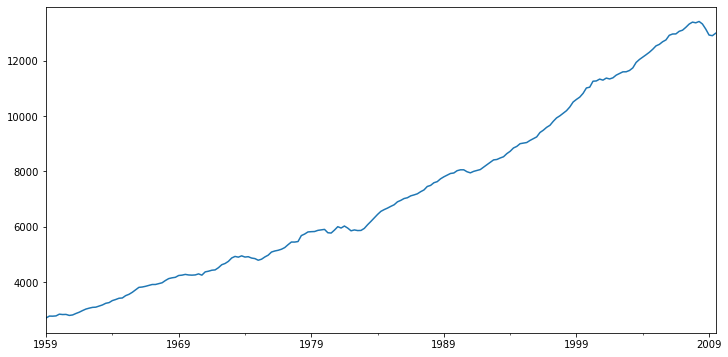

In [13]:
df['realgdp'].plot(figsize=(12,6));

In [14]:
gdp_cycle, gdp_trend=hpfilter(x=df['realgdp'],lamb=1600)

In [16]:
type(gdp_trend)

pandas.core.series.Series

In [17]:
df['gdp_cycle']=gdp_cycle
df['gdp_trend']=gdp_trend

In [18]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,gdp_cycle,gdp_trend
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,39.511915,2670.837085
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,80.088532,2698.712468
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,48.875455,2726.612545
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,30.591933,2754.612067
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,64.882667,2782.816333


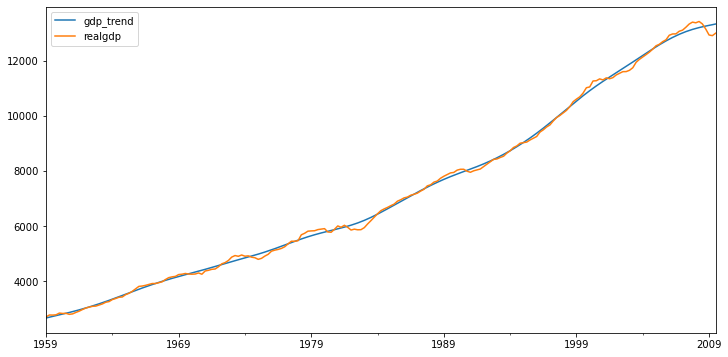

In [21]:
df[['gdp_trend','realgdp']].plot(figsize=(12,6));

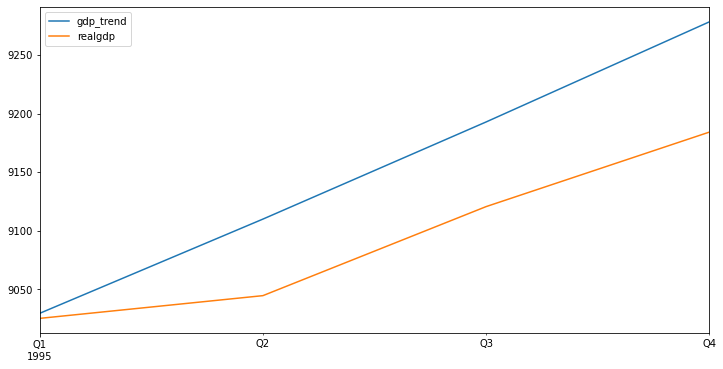

In [25]:
df[['gdp_trend','realgdp']]['1995'].plot(figsize=(12,6));

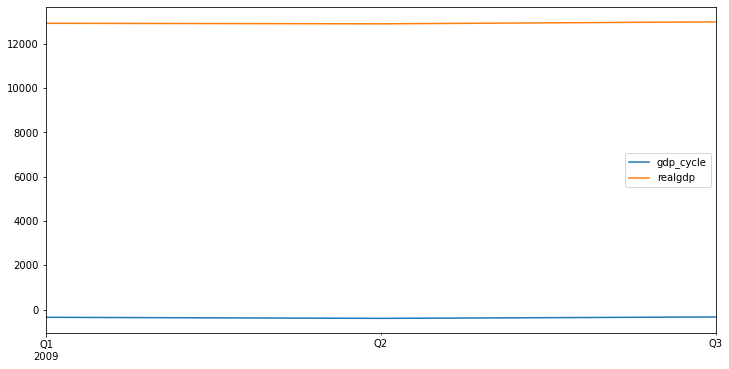

In [24]:
df[['gdp_cycle','realgdp']]['2009'].plot(figsize=(12,6));

# ETS DECOMPOSITION(ERROR-TREND-SMOOTHNING)

In [61]:
df_ets=pd.read_csv('C:/Users/anuj/Documents/Anuj/MMA/Udemy/Python/Time Series/UDEMY_TSA_FINAL/Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [62]:
df_ets.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


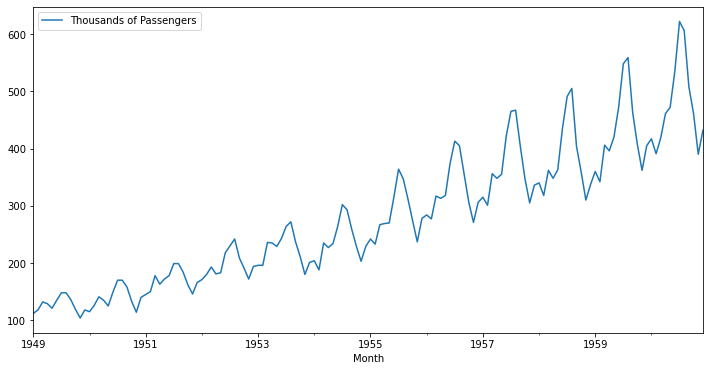

In [63]:
df_ets.plot(figsize=(12,6));

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [65]:
decomp = seasonal_decompose(df_ets['Thousands of Passengers'],model='multiplicative',)

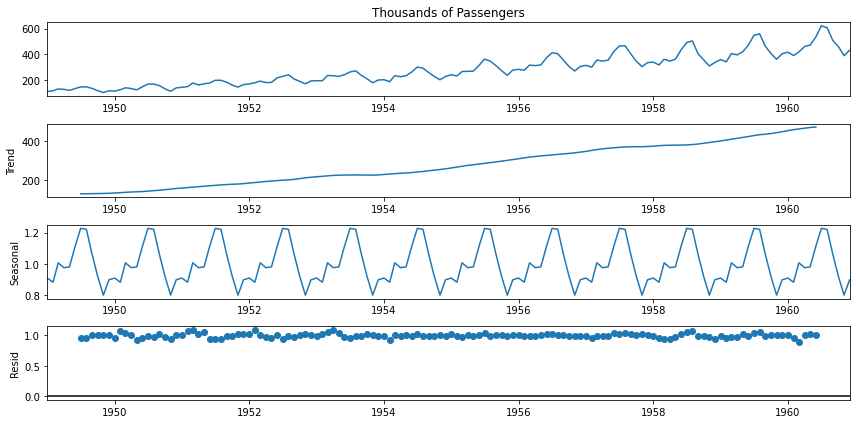

In [66]:
from pylab import rcParams

rcParams['figure.figsize']=(12,6)

decomp.plot();

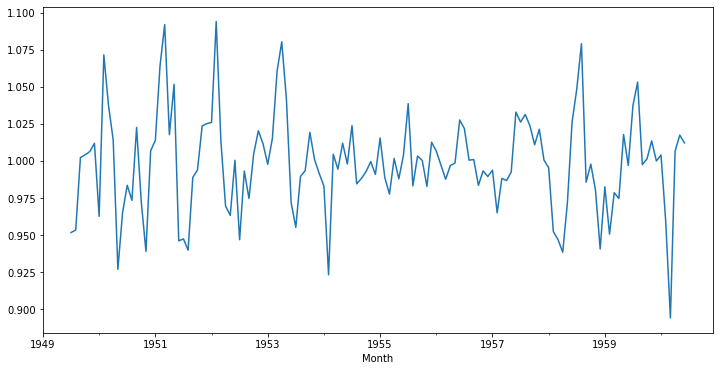

In [67]:
decomp.resid.plot()

# Exponential Weighted Moving Average

In [68]:
df_ets['6-SMA']=df_ets['Thousands of Passengers'].rolling(window=6).mean()

In [69]:
df_ets['12-SMA']=df_ets['Thousands of Passengers'].rolling(window=12).mean()

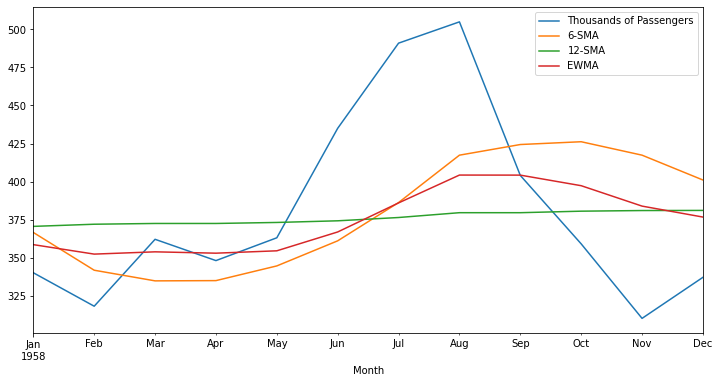

In [81]:
df_ets['1958'].plot();

In [74]:
df_ets['EWMA']=df_ets['Thousands of Passengers'].ewm(span=12).mean()

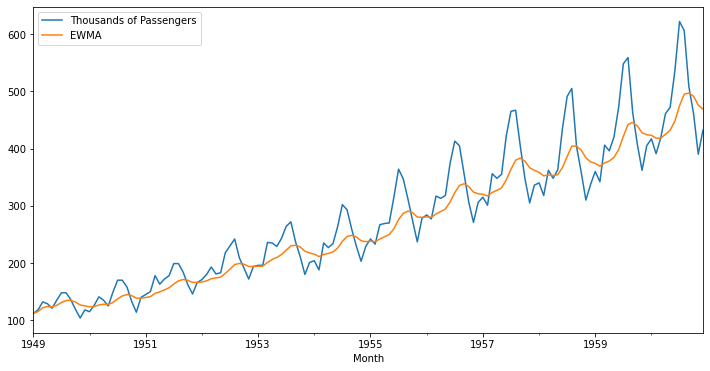

In [80]:
df_ets[['Thousands of Passengers','EWMA']].plot();

# Holt-Winters Method

In [82]:
df_hw=pd.read_csv('C:/Users/anuj/Documents/Anuj/MMA/Udemy/Python/Time Series/UDEMY_TSA_FINAL/Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [83]:
df_hw.isna().sum()

Thousands of Passengers    0
dtype: int64

In [84]:
df_hw=df_hw.dropna()

In [88]:
df_hw.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [87]:
df_hw.index.freq='MS'

In [89]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [96]:
span=12
alpha=(2/(span+1))

In [97]:
df_hw['12-EWMA']=df_hw['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()

In [98]:
df_hw

,Thousands of Passengers,12-EWMA
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861
...,...,...
1960-08-01,606,494.898619
1960-09-01,508,496.914216
1960-10-01,461,491.388952


In [108]:
model=SimpleExpSmoothing(df_hw['Thousands of Passengers'])

In [109]:
model_fit=model.fit(smoothing_level=alpha,optimized=False)

In [110]:
model_fit.fittedvalues

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    112.923077
1949-04-01    115.857988
1949-05-01    117.879836
                 ...    
1960-08-01    474.698368
1960-09-01    494.898619
1960-10-01    496.914216
1960-11-01    491.388952
1960-12-01    475.790652
Freq: MS, Length: 144, dtype: float64

In [112]:
df_hw['StatsModelsEWM']=model_fit.fittedvalues.shift(-1)

In [113]:
df_hw

,Thousands of Passengers,12-EWMA,StatsModelsEWM
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861
...,...,...,...
1960-08-01,606,494.898619,494.898619
1960-09-01,508,496.914216,496.914216
1960-10-01,461,491.388952,491.388952


In [114]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [148]:
model_exp_add=ExponentialSmoothing(df_hw['Thousands of Passengers'],trend='add')

In [149]:
model_exp_add_fit=model_exp_add.fit()

C:\Users\anuj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [150]:
df_hw['Statsmodels_Exp_Smooth_add']=model_exp_add_fit.fittedvalues.shift(-1)

In [151]:
df_hw

,Thousands of Passengers,12-EWMA,StatsModelsEWM,Statsmodels_Exp_Smooth,Statsmodels_Exp_Smooth_add
Month,,,,,
1949-01-01,112,112.000000,112.000000,112.049247,114.237768
1949-02-01,118,112.923077,112.923077,118.051885,120.237768
1949-03-01,132,115.857988,115.857988,132.058041,134.237768
1949-04-01,129,117.879836,117.879836,129.056722,131.237768
1949-05-01,121,118.359861,118.359861,121.053204,123.237768
...,...,...,...,...,...
1960-08-01,606,494.898619,494.898619,606.266459,608.237768
1960-09-01,508,496.914216,496.914216,508.223369,510.237768
1960-10-01,461,491.388952,491.388952,461.202703,463.237768


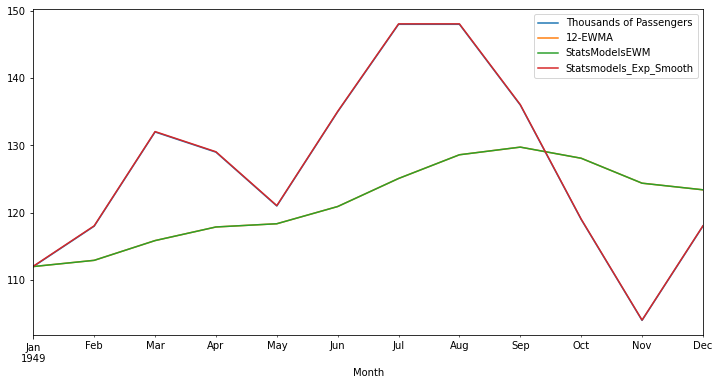

In [147]:
df_hw['1949'].plot();

In [152]:
model_exp_mul=ExponentialSmoothing(df_hw['Thousands of Passengers'],trend='mul')
model_exp_mul_fit=model_exp_mul.fit()
df_hw['Statsmodels_Exp_Smooth_mul']=model_exp_mul_fit.fittedvalues.shift(-1)
df_hw

C:\Users\anuj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


,Thousands of Passengers,12-EWMA,StatsModelsEWM,Statsmodels_Exp_Smooth,Statsmodels_Exp_Smooth_add,Statsmodels_Exp_Smooth_mul
Month,,,,,,
1949-01-01,112,112.000000,112.000000,112.049247,114.237768,112.049247
1949-02-01,118,112.923077,112.923077,118.051885,120.237768,118.051885
1949-03-01,132,115.857988,115.857988,132.058041,134.237768,132.058041
1949-04-01,129,117.879836,117.879836,129.056722,131.237768,129.056722
1949-05-01,121,118.359861,118.359861,121.053204,123.237768,121.053204
...,...,...,...,...,...,...
1960-08-01,606,494.898619,494.898619,606.266459,608.237768,606.266459
1960-09-01,508,496.914216,496.914216,508.223369,510.237768,508.223369
1960-10-01,461,491.388952,491.388952,461.202703,463.237768,461.202703


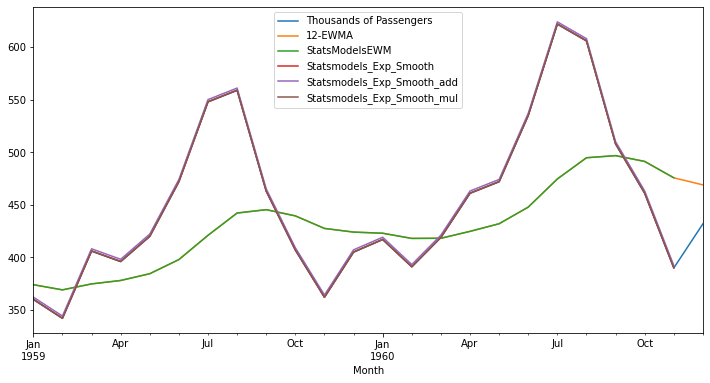

In [155]:
df_hw['1959':'1960'].plot();

In [156]:
model_tes_mul=ExponentialSmoothing(df_hw['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12)
model_tes_mul_fit=model_tes_mul.fit()
df_hw['Statsmodels_tes_mul']=model_tes_mul_fit.fittedvalues
df_hw

C:\Users\anuj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\anuj\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


,Thousands of Passengers,12-EWMA,StatsModelsEWM,Statsmodels_Exp_Smooth,Statsmodels_Exp_Smooth_add,Statsmodels_Exp_Smooth_mul,Statsmodels_tes_mul
Month,,,,,,,
1949-01-01,112,112.000000,112.000000,112.049247,114.237768,112.049247,111.617632
1949-02-01,118,112.923077,112.923077,118.051885,120.237768,118.051885,118.865568
1949-03-01,132,115.857988,115.857988,132.058041,134.237768,132.058041,133.356716
1949-04-01,129,117.879836,117.879836,129.056722,131.237768,129.056722,127.928753
1949-05-01,121,118.359861,118.359861,121.053204,123.237768,121.053204,121.003420
...,...,...,...,...,...,...,...
1960-08-01,606,494.898619,494.898619,606.266459,608.237768,606.266459,629.375202
1960-09-01,508,496.914216,496.914216,508.223369,510.237768,508.223369,512.001634
1960-10-01,461,491.388952,491.388952,461.202703,463.237768,461.202703,448.038790


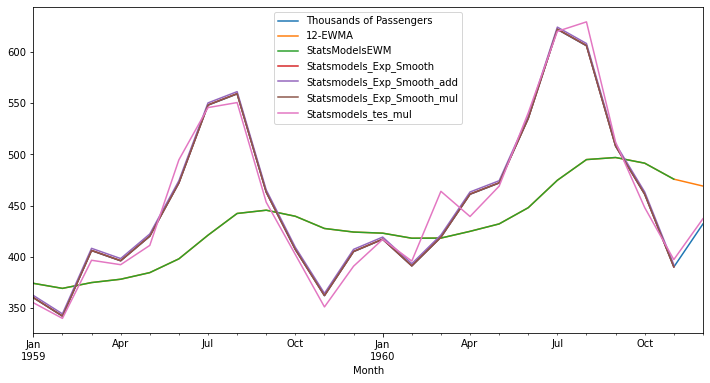

In [160]:
df_hw['1959':'1960'].plot();